# Extract data

In [ ]:
#pip install cssselect

In [1]:
import numpy as np 
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import csv
from lxml import html
import re

**Teams' pages scraping**

In this section, we are scraping the pages for each team in Primier League. To do so , we will first access the page containing all clubs. Then , we will loop through all teams and save their links in a list so we can use them latter. In the clubs page, each team is represented by a link that takes you to the team page containing its stats and overview

In [2]:
#Take site and structure html
page = requests.get('https://www.premierleague.com/clubs')
tree = html.fromstring(page.content)

In [3]:
# extract link locations related to the teams contained in the page
linkLocation = tree.cssselect('.indexItem')

In [4]:
#Create an empty list for us to send each team's link to
teamLinks = []

# There are 20 teams, we will loop through them 
for i in range(0,20):
    
    # A variable that contains the ith team's link location
    temp = linkLocation[i].attrib['href']
    
    # To access the page of each team using the code i.e not manually, we will add the team's link to the website domain 
    temp = "http://www.premierleague.com/" + temp
    
    # When opening the team's page it will be the overview page, we will change it to squad since we are interested in players
    temp = temp.replace("overview", "squad")
    
    #Add the finished link to our teamLinks list
    teamLinks.append(temp)

**Players' pages scraping**

In this section, we will use the links we have got for each team and we will make a list of similar links for all playeras in that team. This will help us scrape the information of each player later  

In [5]:
#Create empty lists for player links
#First list is used for links in the overview page of each player while the second is used for the stats page
#Each page contains information we will need for each player
playerLink1 = []
playerLink2 = []

#looping through teams using their links
for i in range(len(teamLinks)):
    
    #accessing each team page 
    squadPage = requests.get(teamLinks[i])
    squadTree = html.fromstring(squadPage.content)
    
    #Extracting players' links, they are under class 'playerOverviewCard'
    playerLocation = squadTree.cssselect('.playerOverviewCard')

    #loop through players links in order to add them to the website domain. This eliminates the need for accessing each players page manually
    for i in range(len(playerLocation)):
        
        # add the link to the website domain 
        playerLink1.append("http://www.premierleague.com/" + playerLocation[i].attrib['href'])
        
        


In [6]:
for i in range(len(playerLink1)):
    temp=playerLink1[i].replace("overview", "stats")
    playerLink2.append(playerLink1[i].replace("overview", "stats"))

In [7]:
#Create lists for each variable
Name = []
Team = []
Age = []
Apps = []
HeightCM = []
WeightKG = []
Goals= []
Assists=[]
Passes=[]
Wins=[]
Losses=[]
Yellowcards=[]
Redcards=[]
Fouls=[]
Position=[]

In [8]:
for i in range(len(playerLink1)):

    #...download and process the two pages collected earlier...
    playerPage1 = requests.get(playerLink1[i])
    playerTree1 = html.fromstring(playerPage1.content)
    playerPage2 = requests.get(playerLink2[i])
    playerTree2 = html.fromstring(playerPage2.content)

    #...find the relevant datapoint for each player, starting with name...
    tempName = str(playerTree1.cssselect('div.name')[0].text_content())
    #print(tempName)
    
    #...and team, but if there isn't a team, return "BLANK"...
    try:
        tempTeam = str(playerTree1.cssselect('.table:nth-child(1) .long')[0].text_content())
    except IndexError:
        tempTeam = str("BLANK")
    #print(tempTeam)
    
    #...and age, but if this isn't there, leave a blank 'no number' number...
    try:  
        tempAge = playerTree1.cssselect('.pdcol2 li:nth-child(1) .info--light')[0].text_content()
        res= tempAge[tempAge.find("(")+1:tempAge.find(")")]
        #res = re.findall(r"\(\s*\+?(-?\d+)\s*\)", tempAge)
    except IndexError:
        tempAge = float('NaN')
    #print(res) 

    #...and appearances. This is a bit of a mess on the page, so tidy it first...
    try:
        tempApps = playerTree2.cssselect('.statappearances')[0].text_content()
        tempApps = int(re.search(r'\d+', tempApps).group())
    except IndexError:
        tempApps = float('NaN')
        

    #...and height. Needs tidying again...
    try:
        tempHeight = playerTree1.cssselect('.pdcol3 li:nth-child(1) .info')[0].text_content()
        tempHeight = int(re.search(r'\d+', tempHeight).group())
    except IndexError:
        tempHeight = float('NaN')

    #...and weight. Same with tidying and returning blanks if it isn't there
    try:
        tempWeight = playerTree1.cssselect('.pdcol3 li+ li .info')[0].text_content()
        tempWeight = int(re.search(r'\d+', tempWeight).group())
    except IndexError:
        tempWeight = float('NaN')
    
    try:
        tempgoals =  playerTree2.cssselect('.statgoals')[0].text_content()
        tempgoals = int(re.search(r'\d+', tempgoals).group())
    except IndexError:
        tempgoals = float('NaN')
    #print(tempgoals)
    
    try:
        tempassists =  playerTree2.cssselect('.statgoal_assist')[0].text_content()
        tempassists = int(re.search(r'\d+', tempassists).group())
    except IndexError:
        tempassists = float('NaN')
    #print(tempassists)
    
    try:
        tempapasses =  playerTree2.cssselect('.stattotal_pass')[0].text_content()
        res2=tempapasses.replace(",", "")
        tempapasses = int(re.search(r'\d+', res2).group())
        
    except IndexError:
        tempapasses = float('NaN')
    #print(tempapasses)
    
    
    try:
        tempwins = playerTree2.cssselect('.statwins')[0].text_content()
        tempwins = int(re.search(r'\d+', tempwins).group())
    except IndexError:
        tempwins = float('NaN')
    
    try:
        templosses = playerTree2.cssselect('.statlosses')[0].text_content()
        templosses = int(re.search(r'\d+', templosses).group())
    except IndexError:
        templosses = float('NaN')
        
    try:
        tempYellowcards = playerTree2.cssselect('.statyellow_card')[0].text_content()
        tempYellowcards = int(re.search(r'\d+', tempYellowcards).group())
    except IndexError:
        tempYellowcards = float('NaN')
        
    try:
        tempRedcards = playerTree2.cssselect('.statred_card')[0].text_content()
        tempRedcards = int(re.search(r'\d+', tempRedcards).group())
    except IndexError:
        tempRedcards = float('NaN')
        
    try:
        tempFouls = playerTree2.cssselect('.statfouls')[0].text_content()
        tempFouls = int(re.search(r'\d+', tempFouls).group())
    except IndexError:
        tempFouls = float('NaN')     
        
    try:
        tempposition = str(playerTree1.cssselect('.playerOverviewAside .info')[1].text_content())
    except IndexError:
        tempposition = str("BLANK")
    #print(tempposition)
    
    #Now that we have a player's full details - add them all to the lists
    
    Name.append(tempName)
    Team.append(tempTeam)
    Age.append(res)
    Apps.append(tempApps)
    HeightCM.append(tempHeight)
    WeightKG.append(tempWeight)
    Goals.append(tempgoals)
    Assists.append(tempassists)
    Passes.append(tempapasses)
    Wins.append(tempwins)
    Losses.append(templosses)
    Yellowcards.append(tempYellowcards)
    Redcards.append(tempRedcards)
    Fouls.append(tempFouls)
    Position.append(tempposition)

In [9]:
#Create data frame from lists
df = pd.DataFrame(
    {'Name':Name,
     'Team':Team,
     'Positon':Position,
     'Age':Age,
     'Apps':Apps,
     'HeightCM':HeightCM,
     'WeightKG':WeightKG,
    'Goals':Goals,
    'Assists':Assists,
    'Passes':Passes,
     'Wins':Wins,
      'Losses':Losses,
   'Yellowcards':Yellowcards,
    'Redcards':Redcards,
    'Fouls':Fouls})

#Show me the top 20 rows:

df.head(20)

,Name,Team,Positon,Age,Apps,HeightCM,WeightKG,Goals,Assists,Passes,Wins,Losses,Yellowcards,Redcards,Fouls
0,Bernd Leno,Arsenal,Goalkeeper,29,95,190.0,83.0,0,0,2665,41,28,2,1,2
1,RÃºnar Alex RÃºnarsson,Arsenal,Goalkeeper,26,1,186.0,76.0,0,0,9,0,1,0,0,0
2,Karl Hein,Arsenal,Goalkeeper,19,0,193.0,NaN,0,0,0,0,0,0,0,0
3,Mat Ryan,Arsenal (Loan),Goalkeeper,29,124,184.0,82.0,0,0,3596,29,55,3,0,2
4,Arthur Okonkwo,Arsenal,Goalkeeper,19,0,NaN,NaN,0,0,0,0,0,0,0,0
5,James Hillson,Arsenal,Goalkeeper,20,0,NaN,NaN,0,0,0,0,0,0,0,0
6,HÃ©ctor BellerÃ­n,Arsenal,Defender,26,183,178.0,74.0,8,20,8141,99,47,30,0,143
7,Kieran Tierney,Arsenal,Defender,23,40,178.0,70.0,2,3,1561,17,15,6,0,21
8,Rob Holding,Arsenal,Defender,25,67,189.0,75.0,0,1,3691,35,20,10,0,51
9,Calum Chambers,Arsenal,Defender,26,147,182.0,66.0,6,4,6275,51,59,28,1,142


In [10]:
df.shape

(646, 15)

In [11]:
df.to_csv('Teams_data.csv' ,index=False )

# Pre-processing

In [2]:
df = pd.read_csv('Teams_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         646 non-null    object 
 1   Team         646 non-null    object 
 2   Positon      646 non-null    object 
 3   Age          646 non-null    int64  
 4   Apps         646 non-null    int64  
 5   HeightCM     506 non-null    float64
 6   WeightKG     482 non-null    float64
 7   Goals        646 non-null    int64  
 8   Assists      646 non-null    int64  
 9   Passes       646 non-null    int64  
 10  Wins         646 non-null    int64  
 11  Losses       646 non-null    int64  
 12  Yellowcards  646 non-null    int64  
 13  Redcards     646 non-null    int64  
 14  Fouls        646 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 75.8+ KB


In [4]:
df['Age']=pd.to_numeric(df['Age'])

In [5]:
#cheking for null values
df.isnull().sum()

Name             0
Team             0
Positon          0
Age              0
Apps             0
HeightCM       140
WeightKG       164
Goals            0
Assists          0
Passes           0
Wins             0
Losses           0
Yellowcards      0
Redcards         0
Fouls            0
dtype: int64

In [27]:
df=df[df['Apps']!=0]

In [28]:
df.isnull().sum()

Name            0
Team            0
Positon         0
Age             0
Apps            0
HeightCM       45
WeightKG       58
Goals           0
Assists         0
Passes          0
Wins            0
Losses          0
Yellowcards     0
Redcards        0
Fouls           0
dtype: int64

We have a missing data in HeightCM and WeightKG columns. So, we will fill them with the average height and weight for the players in the same age.

In [6]:
# group the players by age
group = df[['HeightCM' ,'WeightKG' ,'Age']].groupby('Age').mean()
# fill the null values with the mean 
for i , r in df[df['HeightCM'].isnull()].iterrows():
    age = df.iloc[i,3]
    df.iloc[i,5] = group.loc[age , 'HeightCM']
    
for i , r in df[df['WeightKG'].isnull()].iterrows():
    age = df.iloc[i,3]
    df.iloc[i,6] = group.loc[age , 'WeightKG']
df.isnull().sum()

Name           0
Team           0
Positon        0
Age            0
Apps           0
HeightCM       0
WeightKG       0
Goals          0
Assists        0
Passes         0
Wins           0
Losses         0
Yellowcards    0
Redcards       0
Fouls          0
dtype: int64

In [21]:
#creating new columns

df['Wins_ratio'] = df['Wins'] / df['Apps']

df['Goals_ratio'] = df['Goals'] / df['Apps']
    

df['Yellowcardsd_ratio'] = df['Yellowcards'] / df['Apps']

    
df['Fouls_ratio'] = df['Fouls'] / df['Apps']

    

df['Passes_ratio'] = df['Passes'] / df['Apps']
  

In [22]:
df.head()

,Name,Team,Positon,Age,Apps,HeightCM,WeightKG,Goals,Assists,Passes,...,Yellowcards,Redcards,Fouls,Wins_ratio,Yellowcardsd_ratio,Fouls_ratio,Passes_ratio,Ycards_ratio_dicretized,Fouls_ratio_dicretized,Goals_ratio
0,Bernd Leno,Arsenal,Goalkeeper,29,95,190.000000,83.000000,0,0,2665,...,2,1,2,0.431579,0.021053,0.021053,28.052632,Low,Low,0.0
1,RÃºnar Alex RÃºnarsson,Arsenal,Goalkeeper,26,1,186.000000,76.000000,0,0,9,...,0,0,0,0.000000,0.000000,0.000000,9.000000,Low,Low,0.0
2,Karl Hein,Arsenal,Goalkeeper,19,0,193.000000,69.384615,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mat Ryan,Arsenal,Goalkeeper,29,124,184.000000,82.000000,0,0,3596,...,3,0,2,0.233871,0.024194,0.016129,29.000000,Low,Low,0.0
4,Arthur Okonkwo,Arsenal,Goalkeeper,19,0,179.588235,69.384615,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# for further work we will need some columns to be descritisized, in this section we add descritisized columns to the data
# descritizing of some columns
df['Ycards_ratio_dicretized']=pd.qcut(df['Yellowcardsd_ratio'],3, labels=['Low','Medium','High'])
df['Fouls_ratio_dicretized']=pd.qcut(df['Fouls_ratio'],3, labels=['Low','Medium','High'])

In [24]:
df.head()

,Name,Team,Positon,Age,Apps,HeightCM,WeightKG,Goals,Assists,Passes,...,Yellowcards,Redcards,Fouls,Wins_ratio,Yellowcardsd_ratio,Fouls_ratio,Passes_ratio,Ycards_ratio_dicretized,Fouls_ratio_dicretized,Goals_ratio
0,Bernd Leno,Arsenal,Goalkeeper,29,95,190.000000,83.000000,0,0,2665,...,2,1,2,0.431579,0.021053,0.021053,28.052632,Low,Low,0.0
1,RÃºnar Alex RÃºnarsson,Arsenal,Goalkeeper,26,1,186.000000,76.000000,0,0,9,...,0,0,0,0.000000,0.000000,0.000000,9.000000,Low,Low,0.0
2,Karl Hein,Arsenal,Goalkeeper,19,0,193.000000,69.384615,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mat Ryan,Arsenal,Goalkeeper,29,124,184.000000,82.000000,0,0,3596,...,3,0,2,0.233871,0.024194,0.016129,29.000000,Low,Low,0.0
4,Arthur Okonkwo,Arsenal,Goalkeeper,19,0,179.588235,69.384615,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.describe() # statical sammary

,Age,Apps,HeightCM,WeightKG,Goals,Assists,Passes,Wins,Losses,Yellowcards,Redcards,Fouls,Wins_ratio,Yellowcardsd_ratio,Fouls_ratio,Passes_ratio,Goals_ratio
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,25.170279,71.874613,182.148233,75.230426,7.585139,5.356037,2430.743034,29.702786,25.335913,8.027864,0.315789,55.425697,0.372393,0.102227,0.714319,30.796020,0.080214
std,5.052480,85.262230,6.325591,7.018486,17.507333,9.997062,3267.527903,40.270037,29.761431,11.840510,0.714825,77.891277,0.185026,0.087851,0.417610,16.034515,0.108843
min,16.000000,0.000000,163.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,178.550000,70.000000,0.000000,0.000000,23.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.264894,0.038280,0.470441,19.423413,0.000000
50%,25.000000,40.000000,182.000000,74.000000,1.000000,1.000000,1045.000000,14.000000,15.000000,3.000000,0.000000,24.000000,0.361803,0.094710,0.714286,29.104140,0.041167
75%,29.000000,109.500000,186.000000,79.000000,7.000000,6.000000,3526.500000,43.750000,38.750000,11.000000,0.000000,79.000000,0.486713,0.150000,0.963719,40.531863,0.111423
max,39.000000,562.000000,201.000000,101.000000,182.000000,85.000000,19662.000000,282.000000,163.000000,82.000000,5.000000,456.000000,1.000000,1.000000,2.000000,85.533333,0.677686


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Name                     646 non-null    object  
 1   Team                     646 non-null    object  
 2   Positon                  646 non-null    object  
 3   Age                      646 non-null    int64   
 4   Apps                     646 non-null    int64   
 5   HeightCM                 646 non-null    float64 
 6   WeightKG                 646 non-null    float64 
 7   Goals                    646 non-null    int64   
 8   Assists                  646 non-null    int64   
 9   Passes                   646 non-null    int64   
 10  Wins                     646 non-null    int64   
 11  Losses                   646 non-null    int64   
 12  Yellowcards              646 non-null    int64   
 13  Redcards                 646 non-null    int64   
 14  Fouls     

In [27]:
# group the data by team 
team_df = df.groupby('Team').count()
print ('We have {} team'.format(len(team_df)))
team_df

We have 21 team


,Name,Positon,Age,Apps,HeightCM,WeightKG,Goals,Assists,Passes,Wins,...,Yellowcards,Redcards,Fouls,Wins_ratio,Yellowcardsd_ratio,Fouls_ratio,Passes_ratio,Ycards_ratio_dicretized,Fouls_ratio_dicretized,Goals_ratio
Team,,,,,,,,,,,,,,,,,,,,,
Arsenal,32,32,32,32,32,32,32,32,32,32,...,32,32,32,25,25,25,25,25,25,25
Aston Villa,46,46,46,46,46,46,46,46,46,46,...,46,46,46,25,25,25,25,25,25,25
Brighton and Hove Albion,34,34,34,34,34,34,34,34,34,34,...,34,34,34,24,24,24,24,24,24,24
Burnley,29,29,29,29,29,29,29,29,29,29,...,29,29,29,26,26,26,26,26,26,26
Chelsea,28,28,28,28,28,28,28,28,28,28,...,28,28,28,25,25,25,25,25,25,25
Crystal Palace,31,31,31,31,31,31,31,31,31,31,...,31,31,31,26,26,26,26,26,26,26
Everton,33,33,33,33,33,33,33,33,33,33,...,33,33,33,25,25,25,25,25,25,25
Fulham,28,28,28,28,28,28,28,28,28,28,...,28,28,28,26,26,26,26,26,26,26
Lech Poznan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


We now will clean the teams names

In [28]:
# remove '(Loan)' and ' U21' from teams name
# substitute & to and
df['Team'] = df['Team'].apply(lambda x : re.sub("\(Loan\)|U21",' ' ,x).strip())
df['Team'] = df['Team'].apply(lambda x : re.sub("&",'and' ,x))

In [29]:
# group the data by team 
team_df = df.groupby('Team').count()
print ('We have {} different teams'.format(len(team_df)))
team_df

We have 21 different teams


,Name,Positon,Age,Apps,HeightCM,WeightKG,Goals,Assists,Passes,Wins,...,Yellowcards,Redcards,Fouls,Wins_ratio,Yellowcardsd_ratio,Fouls_ratio,Passes_ratio,Ycards_ratio_dicretized,Fouls_ratio_dicretized,Goals_ratio
Team,,,,,,,,,,,,,,,,,,,,,
Arsenal,32,32,32,32,32,32,32,32,32,32,...,32,32,32,25,25,25,25,25,25,25
Aston Villa,46,46,46,46,46,46,46,46,46,46,...,46,46,46,25,25,25,25,25,25,25
Brighton and Hove Albion,34,34,34,34,34,34,34,34,34,34,...,34,34,34,24,24,24,24,24,24,24
Burnley,29,29,29,29,29,29,29,29,29,29,...,29,29,29,26,26,26,26,26,26,26
Chelsea,28,28,28,28,28,28,28,28,28,28,...,28,28,28,25,25,25,25,25,25,25
Crystal Palace,31,31,31,31,31,31,31,31,31,31,...,31,31,31,26,26,26,26,26,26,26
Everton,33,33,33,33,33,33,33,33,33,33,...,33,33,33,25,25,25,25,25,25,25
Fulham,28,28,28,28,28,28,28,28,28,28,...,28,28,28,26,26,26,26,26,26,26
Lech Poznan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [30]:
df.to_csv('processing_Teams_data.csv' ,index=False )

# Analysis

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [32]:
df = pd.read_csv('processing_Teams_data.csv')

In [33]:
df.head()

,Name,Team,Positon,Age,Apps,HeightCM,WeightKG,Goals,Assists,Passes,...,Yellowcards,Redcards,Fouls,Wins_ratio,Yellowcardsd_ratio,Fouls_ratio,Passes_ratio,Ycards_ratio_dicretized,Fouls_ratio_dicretized,Goals_ratio
0,Bernd Leno,Arsenal,Goalkeeper,29,95,190.000000,83.000000,0,0,2665,...,2,1,2,0.431579,0.021053,0.021053,28.052632,Low,Low,0.0
1,RÃºnar Alex RÃºnarsson,Arsenal,Goalkeeper,26,1,186.000000,76.000000,0,0,9,...,0,0,0,0.000000,0.000000,0.000000,9.000000,Low,Low,0.0
2,Karl Hein,Arsenal,Goalkeeper,19,0,193.000000,69.384615,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mat Ryan,Arsenal,Goalkeeper,29,124,184.000000,82.000000,0,0,3596,...,3,0,2,0.233871,0.024194,0.016129,29.000000,Low,Low,0.0
4,Arthur Okonkwo,Arsenal,Goalkeeper,19,0,179.588235,69.384615,0,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


check for normality useing Probability-plot

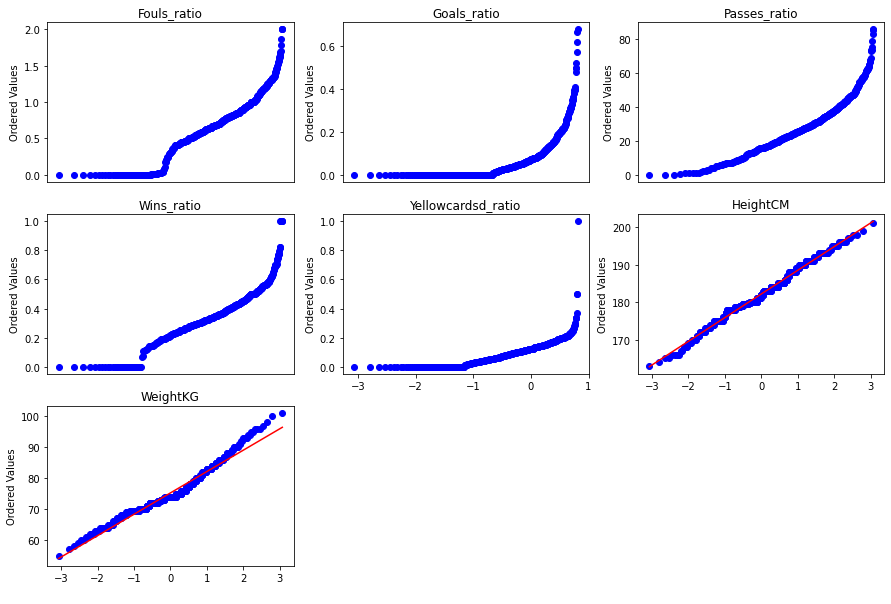

In [40]:
plt.subplot(3,3,1)
#Fouls
data = df['Fouls_ratio'].values
stats.probplot(data , plot =plt)
plt.title('Fouls_ratio')
plt.xlabel(' ')
plt.xticks([])

plt.subplot(3,3,2)
#Goals
data = df['Goals_ratio'].values
stats.probplot(data , plot =plt)
plt.title('Goals_ratio')
plt.xlabel(' ')
plt.xticks([])

plt.subplot(3,3,3)
#Passes
data = df['Passes_ratio'].values
stats.probplot(data , plot =plt)
plt.title('Passes_ratio')
plt.xlabel(' ')
plt.xticks([])

plt.subplot(3,3,4)
#Wins
data = df['Wins_ratio'].values
stats.probplot(data , plot =plt)
plt.title('Wins_ratio')
plt.xlabel(' ')
plt.xticks([])


plt.subplot(3,3,5)
#Yellowcards
data = df['Yellowcardsd_ratio'].values
stats.probplot(data , plot =plt)
plt.title('Yellowcardsd_ratio')
plt.xlabel(' ')



plt.subplot(3,3,6)
#HeightCM
data = df['HeightCM'].values
stats.probplot(data , plot =plt)
plt.title('HeightCM')
plt.xlabel(' ')

plt.subplot(3,3,7)
#WeightKG
data = df['WeightKG'].values
stats.probplot(data , plot =plt)
plt.title('WeightKG')
plt.xlabel(' ')

plt.rcParams["figure.figsize"] = (15,10)
plt.show()

### check for normality useing D’Agostino–Pearson omnibus test

In [41]:
print(stats.normaltest(df['WeightKG'].values))
print(stats.normaltest(df['HeightCM'].values))

NormaltestResult(statistic=52.54670856883541, pvalue=3.887113422918434e-12)
NormaltestResult(statistic=0.20224165316025483, pvalue=0.9038238203468579)


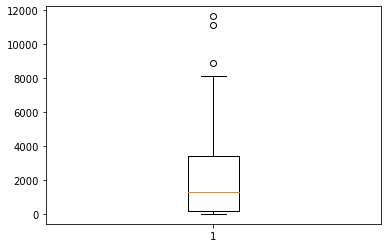

In [109]:
plt.boxplot(df.loc[df['Team']=='Arsenal' ]['Passes'])
plt.show()

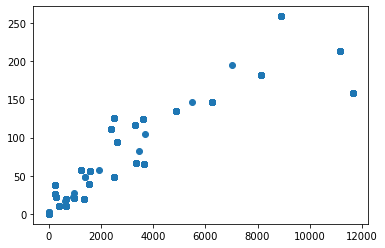

In [67]:
plt.scatter(x = df['Passes']  , y = df['Apps'] )
plt.show()